## Visual Data Exploration of Fitness Activity using Glue 
### Andria Lesane, March 29th 2022


#### Introduction
I will be exploring Professor Chris Brooks' fitness activity data using the Glue Python  library. 

Glue is a multi-disciplinary Python package for linked and multi-dimensional data exploration. It was initially developed for data exploration in the field of astronomy but has since been developed to be applicable to a wide range of disciplines and use cases. 

#### Why Glue?

Glue was created to help handle datasets that are highly dimensional (several columns) and that contain several different data types (images, coordinate systems, tables, multiple files, etc.) Which is the case for the strava dataset and it's numerous bonus .fit files associated with the dataset.


#### To install/import Glue plugin to Jupyter:

In [2]:
#Installing Glue to Juypter Notebook
!pip install git+https://github.com/glue-viz/glue-jupyter.git;

  Cloning https://github.com/glue-viz/glue-jupyter.git to /tmp/pip-req-build-2v_mzebk
  Running command git clone --filter=blob:none -q https://github.com/glue-viz/glue-jupyter.git /tmp/pip-req-build-2v_mzebk
  Resolved https://github.com/glue-viz/glue-jupyter.git to commit 7f3c807ac1795e38b2a658c4a4b5783cbf0b97be
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     |████████████████████████████████| 1.5 MB 17.6 MB/s            
     |████████████████████████████████| 11.7 MB 64.9 MB/s            
     |████████████████████████████████| 523 kB 129.1 MB/s            
     |████████████████████████████████| 2.9 MB 116.2 MB/s            
     |████████████████████████████████| 2.7 MB 125.5 MB/s            
     |████████████████████████████████| 124 kB 137.4 MB/s            
     |████████████████████████████████| 11.2 MB 114.5 MB/s            
     |████████████████████████████████| 655 kB 129.4 MB/s  

In [8]:
#update/install jupyterlab widgets (if necessary). Glue is only compatible with the most up to date version of juptyer widgets.
# This Notebook will be using matplotlib widget to display plots called by the Glue library. Use the following installs if you want to use bqplot 
#After installing, it will require restart of the JuypterLab Browser in addition to restarting the kernel.
!conda install jupyterlab ipywidgets bqplot -y
!conda install -n base -c conda-forge jupyterlab_widgets -y
!conda install -c conda-forge bqplot -y

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.10.3
  latest version: 4.12.0

Please update conda by running

    $ conda update -n base conda



## Package Plan ##

  environment location: /opt/conda

  added / updated specs:
    - bqplot
    - ipywidgets
    - jupyterlab


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    openssl-1.1.1n             |       h166bdaf_0         2.1 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.1 MB

The following packages will be UPDATED:

  openssl                                 1.1.1l-h7f98852_0 --> 1.1.1n-h166bdaf_0



openssl-1.1.1n       | 2.1 MB    | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done
Solving environment: done




In [17]:
# importing jupyter glue library & matplotlib 
import matplotlib #or bqplot
%matplotlib inline
from mpl_toolkits.mplot3d.axes3d import Axes3D
from glue_jupyter import jglue
import pandas as pd
import numpy as np
app = jglue()

#### The Strava Dataset
Below I've loaded the strava.csv file to our notebook. To get an idea of what is contained in the dataset, I generated a print output of our new glue dataset object. 

In [47]:
#loading in strava dataset
strava=app.load_data("strava.csv")
print(strava)


Data Set: strava
Number of dimensions: 1
Shape: 40649
Main components:
 - Air Power
 - Cadence
 - Form Power
 - Ground Time
 - Leg Spring Stiffness
 - Power
 - Vertical Oscillation
 - altitude
 - cadence
 - datafile
 - distance
 - enhanced_altitude
 - enhanced_speed
 - fractional_cadence
 - heart_rate
 - position_lat
 - position_long
 - speed
 - timestamp
 - unknown_87
 - unknown_88
 - unknown_90
Coordinate components:
 - Pixel Axis 0 [x]


The *Main Components* section of the print output lists the column header names in the dataset. Looks like there is  geospacial data as well as typical fitness metrics like heart rate, cadence, speed, etc. 

#### Fitness Activity Classification. 

First, let see if we can determine what type of physical activity Professor Brooks tracked. We will determine this using cadence (a.k.a steps or cycles per minute). For recreational cycling, the average cadence is between 60-80 rpm can go up to 110 rpm for elite clyclists. For endurance running, the cadence of a typical person is between 150-170 spm and elite runners have a cadence greater than 180 spm.

In [48]:
Histogram_cadence =app.histogram1d( data=strava, widget='matplotlib', x='cadence')


LayoutWidget(controls={'toolbar_selection_tools': BasicJupyterToolbar(template=Template(template='<template>\n…

The plot generated above is a histogram with cadence plotted along the x-axis. Glue has options in the interactive editor menu to auto convert the distribution of a histogram plot to a normalized plot or cumulative distribution plot. For this plot I am going to select the normalized plot to get a better account for how frequent Professor Brooks exercises at specifc cadences. 

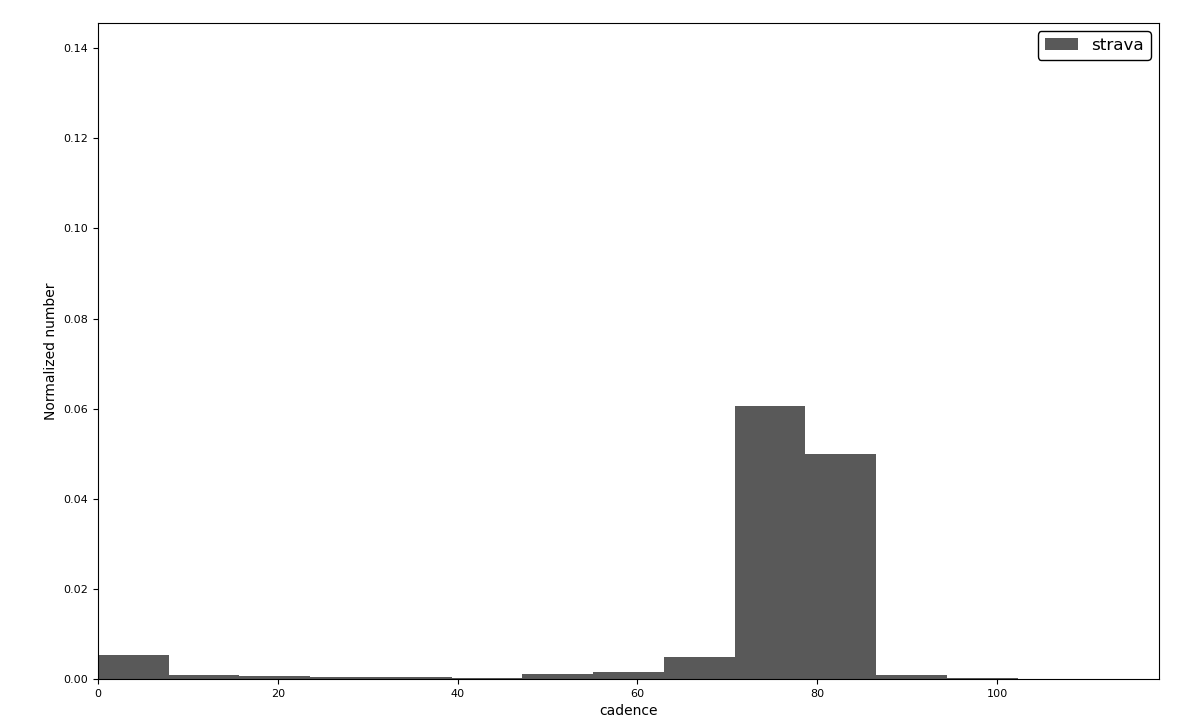


Assuming Professor Brooks is not an olympic athlete, it seems cycling is his fitness activity of choice. His cadence is mostly around 70-85 rpm. The cadence appears to have a smaller peak between 0 and 10 (spm/rpm). This activity could be tracking his day to day walking or it might even be a tracking error from his device. There is also the possibility that cycling sessions are longer than when he decides to walk or run skewing the plot towards the cycling cadence rpm region. Let's further analyze the timestamps to see if the fitness tracking device recorded short walks along with cycling sessions. 


#### Fitness Session Data Exploration:
Now lets use glue to explore the timestamps within the dataset to see how consistent or how often the fitness tracker was collecting data. We will plot the timestamp against distance to see how far Professor Brooks traveled during each session. We will use a 2D scatterplot to plot this. 


In [49]:
scatterplot_timedistance=app.scatter2d(data=strava, widget= 'matplotlib', x='timestamp', y='distance')

LayoutWidget(controls={'toolbar_selection_tools': BasicJupyterToolbar(template=Template(template='<template>\n…

Nice! Glue has now created an interactive 2D scatterplot with timestap along the x-axis and distance ploted along the y-axis. I'm going to use the plot editor menu to add labels to the axis and slightly change the axis scale. 

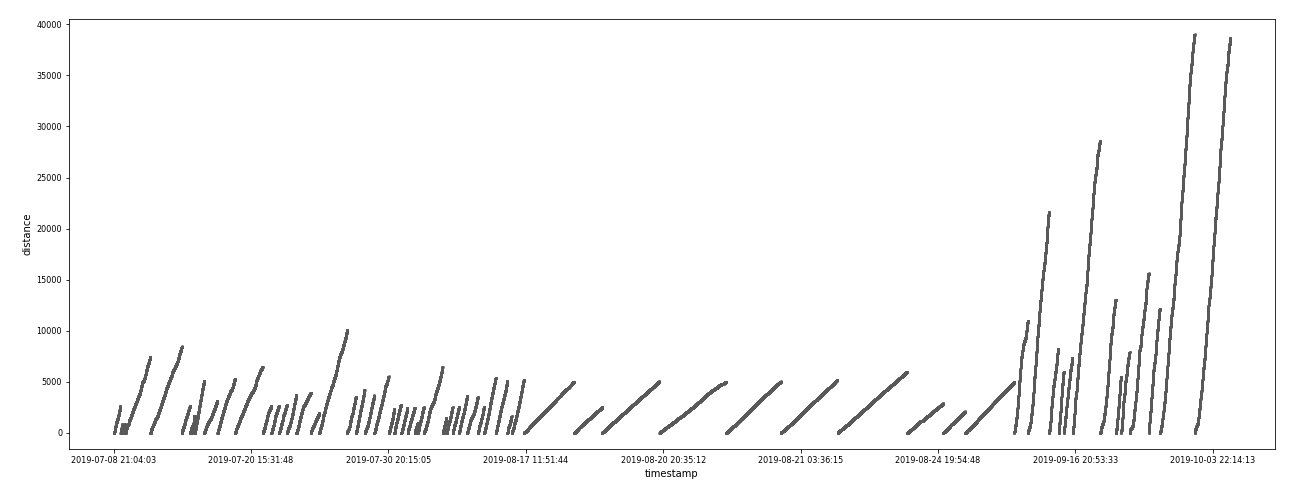

We can immediately see patterns in the data. There are a series of data points resembling slanted, vertical lines. It looks like Professor Brooks captured 60+ seperate sessions. Between September 2019 and October 2019 we see Professor Brooks starts biking for longer distances. A great advantage of Glue is that you can highlight "subset" regions in your chart that can be referrenced in other Glue plots using the same dataset. I'm going to mark a few tracking sessions as data subsets using the lasso tool in the interactive plot viewer. You can also select subset regions programmatically using the app.subset() class, but having the interactive GUI tool is a nice advantage for visual data exploration. I can easily look and select the data points I want and assign each subset to a different color. 

Try highlighting data points yourself in the interactive viewer to follow along. (Tools located in top left bar menu in interative plot viewer)

My final  plot looks like this:
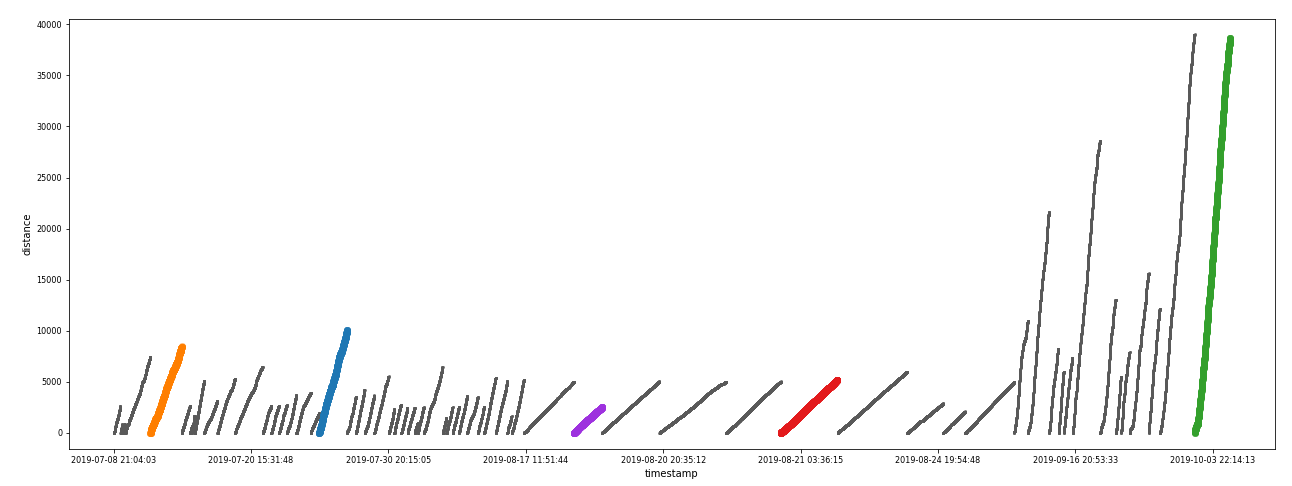

Each subset of data I've highlighted has a different trend shape. Some of the scatterplot "lines" are short and slanted right which indicates a short distance with a long duration (slow speed)  while others subsets are long lines that are nearly vertical indicating a short duration over a long distance (high speed). I wonder if Professor Brooks' cadence differs between the different subsets I've highlighted. 

#### Cadence vs Distance
Now that I've highlighted my subsets in the previous, It will be easy to distignuish each  fitness tracking session from the mass data. I'm going to create another scatterplot except plot distance along the x-axis and cadence along the y-axis. 

Resulting plot after editing with interactive plot viewer tools: 

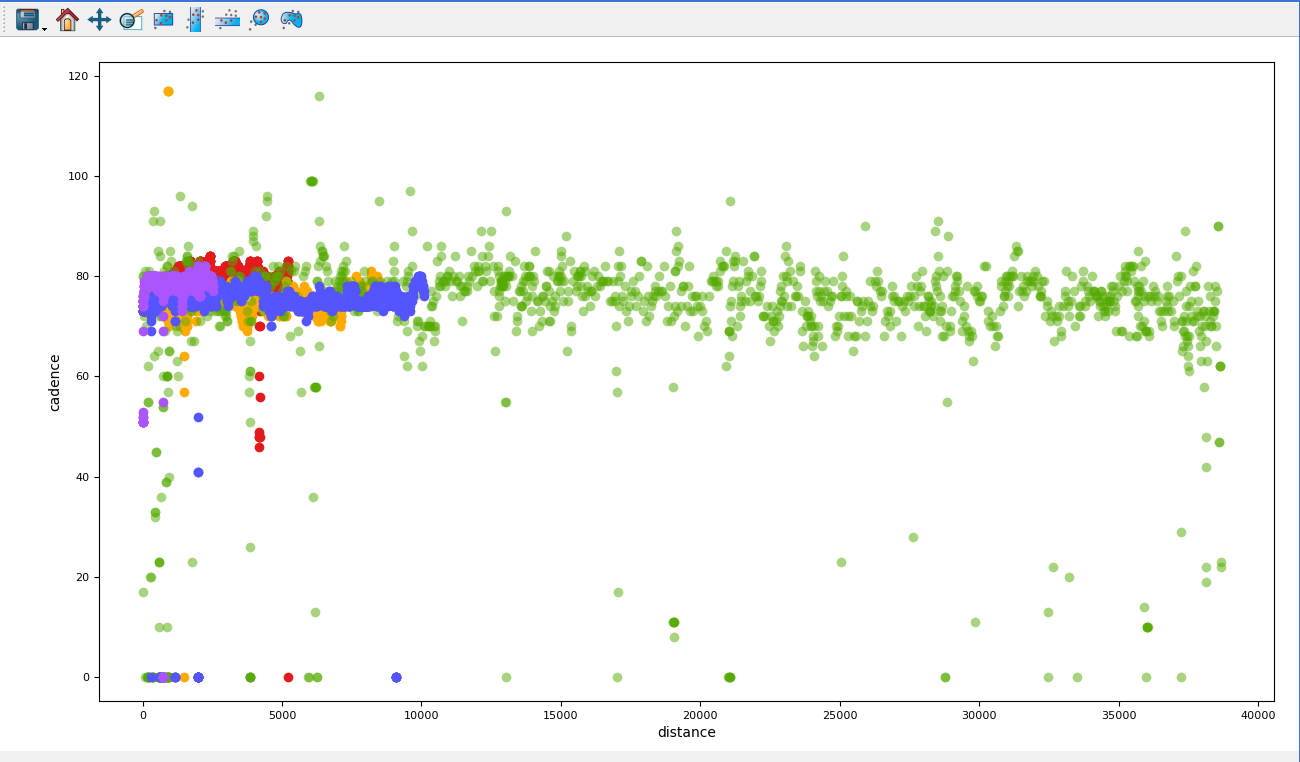



In [50]:
scatter_heartrate =app.scatter2d(data=strava, x="distance", y="cadence")

LayoutWidget(controls={'toolbar_selection_tools': BasicJupyterToolbar(template=Template(template='<template>\n…

Looks like Professor Brooks was completing a cycling session as each session's cadence plateaued to approximately 75-80 rpm shortly after taking off. I do notice that his longer cycling session (green subset) is quite 'messy'. It is possible Professor Brooks could have slowed down to take break or had to stop riding completely which makes since if he was riding in a busy town with stop lights and traffic.   

#### Mapping the Ride
Let's see if we can plot where Professor Brooks was riding. Let's load in our strava dataset into a 3D framework

Looks like the position_lat and position_long coordinates arent in the correct format. Lets change that. 

In [51]:
# Turing coordinates into correct format
df["position_lat_degrees"] = df["position_lat"] * ( 180 / 2**31 )
df["position_long_degrees"] = df["position_long"] * ( 180 / 2**31 )

import math
def lat2y(a):
  return 180.0/math.pi*math.log(math.tan(math.pi/4.0+a*(math.pi/180.0)/2.0))
df["position_lat_degrees_mercantor"]=df["position_lat_degrees"].apply(lat2y)

strava_coordinates=df
print(strava_coordinates)

       Air Power  Cadence  Form Power  Ground Time  Leg Spring Stiffness  \
0            NaN      NaN         NaN          NaN                   NaN   
1            NaN      NaN         NaN          NaN                   NaN   
2            NaN      NaN         NaN          NaN                   NaN   
3            NaN      NaN         NaN          NaN                   NaN   
4            NaN      NaN         NaN          NaN                   NaN   
...          ...      ...         ...          ...                   ...   
40644        NaN      NaN         NaN          NaN                   NaN   
40645        NaN      NaN         NaN          NaN                   NaN   
40646        NaN      NaN         NaN          NaN                   NaN   
40647        NaN      NaN         NaN          NaN                   NaN   
40648        NaN      NaN         NaN          NaN                   NaN   

       Power  Vertical Oscillation  altitude  cadence  \
0        NaN                  

In [52]:
#loading in coordinates dataframe as glue data objects
from glue.core import DataCollection
dc=DataCollection()
dc['stravaCoord']=strava_coordinates



In [56]:
#threeDimplot =app.scatter3d(data = dc['stravaCoord'], x="position_lat_degrees", y="position_long_degrees", z="enhanced_altitude" )
threeDimplot2 =app.scatter3d(data = strava, x="position_lat", y="position_long", z="enhanced_altitude" )

LayoutWidget(controls={'toolbar_selection_tools': BasicJupyterToolbar(template=Template(template='<template>\n…

Resulting Plot: 

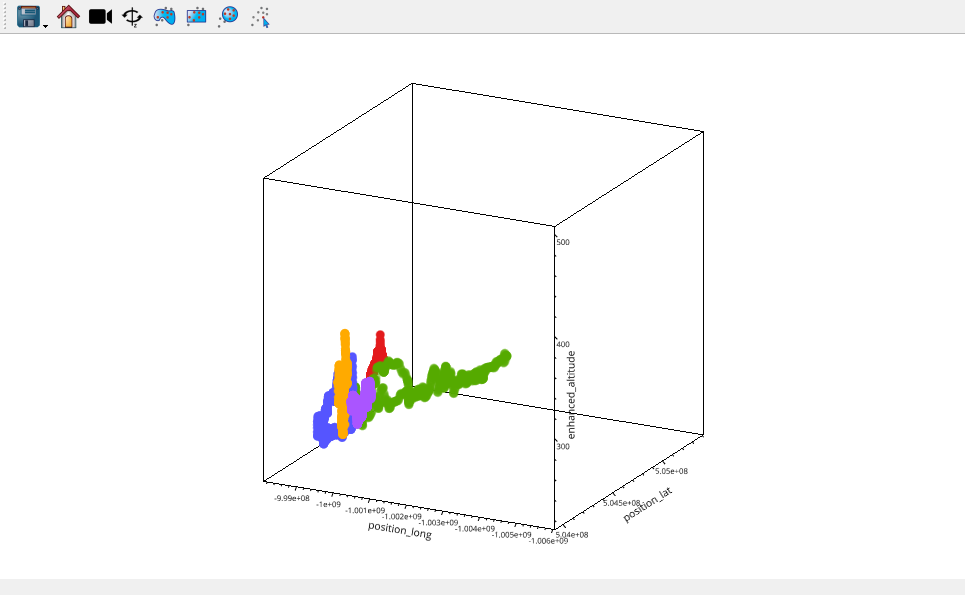


Looks like Professor Brooks started his excercise from the same location with the exception of the session from subset 1. 